# Промежуточная аттестация № 2

Разработать и обучить нейронную сеть на TensorFlow для решения задачи классификации рукописных цифр. Набор данных: MNIST, источник: from keras.datasets import mnist

В нейронной сети должно быть 3 Dense-слоя: два скрытых слоя, состоящих из 128 нейронов каждый, и выходной слой. Активационные функции на скрытых слоях relu, на выходном - softmax.

В качестве ответа необходимо указать количество оптимизируемых параметров (Trainable params) в виде целого числа
и прикрепить к ответу подробное решение с кодом в виде файла или архива с файлами.

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Подготовка данных

**Загрузка**

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

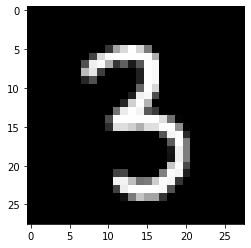

In [3]:
n = 136 

plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности**

In [4]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация**

In [5]:
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255 

**Работа с правильными ответами**

In [6]:
print(y_train_org[n])

3


**Преобразование в one hot encoding**

In [7]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

**Правильный ответ в формате one hot encoding**

In [8]:
print(y_train.shape)

(60000, 10)


In [9]:
print(y_train[n])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Создаем нейронную сеть

In [10]:
model = Sequential()

**Добавляем Dense-слои**


In [11]:
# Из задания - в нейронной сети должно быть 3 Dense-слоя: два скрытых слоя, состоящих из 128 нейронов каждый, 
#и выходной слой. Активационные функции на скрытых слоях relu, на выходном - softmax.
model.add(Dense(128, input_dim=784, activation="relu"))
model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

**Компилируем**

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


## Обучение нейронной сети

In [13]:
model.fit(x_train, y_train, batch_size=128, epochs=20,  verbose=1, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3480 - accuracy: 0.9018 - val_loss: 0.1671 - val_accuracy: 0.9503
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9590 - val_loss: 0.1293 - val_accuracy: 0.9607
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0982 - accuracy: 0.9713 - val_loss: 0.1032 - val_accuracy: 0.9668
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9776 - val_loss: 0.0978 - val_accuracy: 0.9681
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9831 - val_loss: 0.0887 - val_accuracy: 0.9723
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0902 - val_accuracy: 0.9738
Epoch 7/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0910 - val_accuracy: 0.9736
Epoch 

## Сохраняем нейронную сеть

Записываем в файл `mnist_result.h5`

In [14]:
model.save("mnist_result.h5")


Проверяем

In [15]:
!dir

 Том в устройстве C имеет метку Ceteris paribus
 Серийный номер тома: 6C6C-4033

 Содержимое папки C:\Users\ivan\Desktop\Учеба\Data_Science\Att_2

02.11.2022  22:04    <DIR>          .
02.11.2022  21:16    <DIR>          ..
02.11.2022  21:27    <DIR>          .ipynb_checkpoints
02.11.2022  22:04             9 285 att_2.ipynb
02.11.2022  22:05         1 453 288 mnist_result.h5
               2 файлов      1 462 573 байт
               3 папок  151 607 173 120 байт свободно
